# Movies metadata EDA

A partir del dataset de Full MovieLens (https://www.kaggle.com/rounakbanik/the-movies-dataset?select=movies_metadata.csv) que recoge metadatos sobre las 45.000 películas de esta plataforma, se realizará un estudio para comprobar la veracidad de la hipótesis que guiará este trabajo: 

*-La industria del cine no es rentable*

El proyecto estará dividido en tres partes fundamentales, las cuales nos permitirán llegar a una coclusión respecto a la hipótesis planteada. Estas son:

  1. Data cleaning: se procesará el dataset original haciendo accesible los datos contenidos en ella, limpiando la información irrelevante y estructurándolo para su posterior uso.

  2. Data exploration: a través de gráficas se visualizarán los datos contenidos en cada columna, lo que permitirá tener una idea de su distribución y detectar posibles factores a tener en cuenta en su uso.

  3. Visualisations: una vez que se tengan los datos curados, se procederá a representar gráficamente los       distintos indicadores que nos permitirán confirmar o desmentir la hipótesis

# Data Cleaning

En este apartado se importará el dataset desde el directorio donde se ha guardado el CSV con los datos y se empezará a trabajar sobre ellos para dejarlos de forma que puedan ser utilizados para el estudio.
Para ello, generarémos un nuevo dataset que recogerá la información que utilizaremos y haremos minería de datos para que estos sean accesibles. Además, se descartarán los elementos con información extraña o muy anómala.

## Data Structuring

Reordenaremos el dataset original y nos quedaremos con las columnas que son de nuestro interés:

Importamos las librerías necesarias para este paso.

In [1]:
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt

In [2]:
from utils import mining_data_tb as dmin

Se importa el dataset accediendo al directorio donde está guardado. 

In [3]:
# Obtenemos la dirección de la carpeta raiz del proyecto
root_project = os.path.dirname(os.getcwd())
# Adjuntamos esta dirección a las rutas de python para poder importar modulos desde aquí
sys.path.append(root_project)
# Completamos la dirección del archivo csv con el dataset
movies_csv_dir = root_project + '/resources/movies_metadata.csv'

# Leemos el dataset desde el directorio donde se encuentra
movies_csv_df = pd.read_csv(movies_csv_dir, sep= ',')
movies_df = movies_csv_df.copy()

Identificando las columnas se hace una breve pero rápida exploración de los datos que contiene el dataset.

In [4]:
print(list(movies_df.columns), '\n')
print('number of columns --->', len(movies_df.columns))

['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count'] 

number of columns ---> 24


De las 24 columnas del dataset nos interesan solo 10. Generamos una lista ordenada de estas columnas a partir de la cual generaremos el dataframe para el estudio. 

In [5]:
l = ['title', 'release_date', 'original_language', 'genres', 'budget', 'revenue', 'production_countries', 'runtime', 'vote_average', 'vote_count']

In [6]:
movies_df = movies_df[l]
movies_df.head()

,title,release_date,original_language,genres,budget,revenue,production_countries,runtime,vote_average,vote_count
0,Toy Story,1995-10-30,en,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",30000000,373554033.0,"[{'iso_3166_1': 'US', 'name': 'United States o...",81.0,7.7,5415.0
1,Jumanji,1995-12-15,en,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",65000000,262797249.0,"[{'iso_3166_1': 'US', 'name': 'United States o...",104.0,6.9,2413.0
2,Grumpier Old Men,1995-12-22,en,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",0,0.0,"[{'iso_3166_1': 'US', 'name': 'United States o...",101.0,6.5,92.0
3,Waiting to Exhale,1995-12-22,en,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",16000000,81452156.0,"[{'iso_3166_1': 'US', 'name': 'United States o...",127.0,6.1,34.0
4,Father of the Bride Part II,1995-02-10,en,"[{'id': 35, 'name': 'Comedy'}]",0,76578911.0,"[{'iso_3166_1': 'US', 'name': 'United States o...",106.0,5.7,173.0


## Data Mining

In [7]:
movies_df.dtypes

title                    object
release_date             object
original_language        object
genres                   object
budget                   object
revenue                 float64
production_countries     object
runtime                 float64
vote_average            float64
vote_count              float64
dtype: object

Esta observación nos indica el tipo de elementos que contiene cada columna, con lo que podemos identificar que manipulaciones debemos llevar a cabo para que los datos puedan ser utilizados en el estudio. 

A simple vista identificamos los sigientes proplemas:

    - release_date: querremos que esta columna contenga elementos del tipo datetime64

    - budget: esta columna deberá contener valores numéricos para su uso

    - genres, production_countries, production_companies: a la información de estas columnas no es posible             
      acceder de forma directa, será necesario realizar data wrangling.

### -release_dates to datetime64 type

Comprobamos rápidamente si release_dates puede ser convertida a tipo datetime

In [8]:
dmin.fast_datetime_check(movies_df.release_date)

Given date string not likely a datetime


Al intentar convertir todos los elementos de release_date a datetime64 aparece el error de arriba. Esto ocurre porque al menos un valor de la columna no aparece en un formato que la librería de pandas pueda convertir al tipo datetime64.  
Debemos indentificar estos elementos:

In [9]:
not_a_date_list = dmin.not_a_datetime_detector(date_column=movies_df.release_date)

[19730, 29503, 35587]


In [10]:
movies_df.iloc[not_a_date_list]

,title,release_date,original_language,genres,budget,revenue,production_countries,runtime,vote_average,vote_count
19730,NaN,1,104.0,"[{'name': 'Carousel Productions', 'id': 11176}...",/ff9qCepilowshEtG2GYWwzt2bs4.jpg,NaN,6.0,NaN,NaN,NaN
29503,NaN,12,68.0,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...",/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,NaN,7.0,NaN,NaN,NaN
35587,NaN,22,82.0,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...",/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,NaN,4.3,NaN,NaN,NaN


Observando los datos para estos elementos, parece razonable eliminarlos del dataset ya que tienen muchos otros datos vacíos y no aportarán utilidad al estudio

In [11]:
movies_df = movies_df.drop(not_a_date_list)

In [12]:
movies_df = movies_df.reset_index(drop=True)

Ahora podemos convertir directamente la columna release_date a tipo datetime

In [13]:
movies_df.release_date = pd.to_datetime(movies_df.release_date)
movies_df.release_date

0       1995-10-30
1       1995-12-15
2       1995-12-22
3       1995-12-22
4       1995-02-10
           ...    
45458          NaT
45459   2011-11-17
45460   2003-08-01
45461   1917-10-21
45462   2017-06-09
Name: release_date, Length: 45463, dtype: datetime64[ns]

### -budget to numerical values

En este caso podemos hacer la conversión directamente

In [14]:
movies_df.budget = pd.to_numeric(movies_df.budget)
movies_df.budget.dtype

dtype('int64')

## Data wrangling

Las columnas genres, production_companies y production_countries tienen los datos en una forma en la que no es posible acceder a ellos. Es necesario minar estos datos.

Gracias a la librería json, transformamos la información de las columnas que están en este formato (interpretado como 'str') de forma que se reconozcan los objetos de python, como por ejemplo: listas, diccionarios, etc. 

In [15]:
import json

### - genres

Con la siguiente función conseguimos transformar los jsons a listas de diccionarios y a partir de ellos generamos listas con los géneros de cada película, es este caso, los valores correspondientes a la clave name.

Esta función incluye una etapa de preprocesamiento para la aplicación de funciones de la librería json, asegurandose de identificar elementos problemáticos (como elementos no strings o caractéres problemáticos dentro de los strings a través de una identificación por regex) y corregirlos, así como de extracción de la información relevante y agrupación en listas.

In [16]:
genres_to_list = dmin.series_json_to_list(movies_df.genres, 'name')

Número de elemenos únicos ---> 20
 Todos los elementos únicos de la columna:
 {'Action', 'Crime', 'Mystery', 'Horror', 'Foreign', 'Comedy', 'Music', 'Family', 'Romance', 'Science Fiction', 'War', 'History', 'Fantasy', 'Drama', 'Adventure', 'Animation', 'Western', 'Thriller', 'Documentary', 'TV Movie'}


In [17]:
genres_to_list.head()

,genres
0,"[Animation, Comedy, Family]"
1,"[Adventure, Fantasy, Family]"
2,"[Romance, Comedy]"
3,"[Comedy, Drama, Romance]"
4,[Comedy]


Sustiuimos la columna original de nuestro dataset por la que se ha generado:

In [18]:
movies_df['genres'] = genres_to_list

Puede ser de utilidad crear un dataframe de la columna genres expandida, de forma que todos los generos correspondan a las columnas:

        -se crea un dataframe de una columna compuesta por diccionarios donde la clave y el valor
         corresponden a los generos de cada película

        -a partir de este dataframe generamos el dataframe expandido donde cada columna representa uno 
         de los 20 géneros de nuestro dataset original

In [19]:
genre_df_expanded = dmin.expand_df(movies_df.genres)
genre_df_expanded.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,NaN,NaN,Animation,Comedy,NaN,NaN,NaN,Family,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Adventure,NaN,NaN,NaN,NaN,NaN,Family,Fantasy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,Comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Romance,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,Comedy,NaN,NaN,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Romance,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,Comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
genre_df_expanded.count().sort_values(ascending=False).head()

Drama       20265
Comedy      13182
Thriller     7624
Romance      6735
Action       6596
dtype: int64

### - production_countries

In [21]:
countries_to_list = dmin.series_json_to_list(movies_df.production_countries, 'name')
countries_to_list.head()

errors column positions: [4321, 6954, 19729, 23273, 29501, 30433, 35584, 39705]
Número de elemenos únicos ---> 160
 Todos los elementos únicos de la columna:
 {'Liberia', 'Trinidad and Tobago', 'Rwanda', 'North Korea', 'Qatar', 'Uzbekistan', 'Morocco', 'French Southern Territories', 'Armenia', 'Vietnam', 'Malaysia', 'Singapore', 'Ireland', 'Mali', 'Guinea', 'Libyan Arab Jamahiriya', 'Azerbaijan', 'Macedonia', 'Cyprus', 'Cameroon', 'India', 'Netherlands Antilles', 'Dominican Republic', 'Slovakia', 'Australia', 'Puerto Rico', 'Montenegro', 'Cambodia', 'Taiwan', 'Samoa', 'Lithuania', 'Moldova', 'Colombia', 'Uganda', 'Burkina Faso', 'Ghana', 'Senegal', 'Honduras', 'Croatia', 'China', 'East Germany', 'Netherlands', 'Poland', 'Algeria', 'Georgia', 'Barbados', 'Russia', 'Bahamas', 'New Zealand', 'Serbia and Montenegro', 'Paraguay', 'Zimbabwe', 'Estonia', 'Nigeria', 'Cuba', 'Madagascar', 'Uruguay', 'Czechoslovakia', 'Turkey', 'Norway', 'Thailand', 'Bulgaria', 'Indonesia', 'Peru', 'Bangladesh',

,production_countries
0,[United States of America]
1,[United States of America]
2,[United States of America]
3,[United States of America]
4,[United States of America]


Sustituimos production_countries por la nueva columna generada

In [22]:
movies_df['production_countries'] = countries_to_list

Podemos expandir esta columna en un nuevo dataset

In [23]:
prod_countries_expanded = dmin.expand_df(movies_df.production_countries)
prod_countries_expanded.count().sort_values(ascending=False).head()

United States of America    21153
United Kingdom               4094
France                       3940
Germany                      2254
Italy                        2169
dtype: int64

## Dataset exports

Exportaremos los dataset minados a archivos CSV y pickle para su posterior uso en el resto de investigaciones

-Movies metadata dataset:

In [26]:
movies_df.to_csv(root_project + r"/resources/movies_df.csv", index=False)

In [27]:
movies_df.to_pickle(root_project + r"/resources/movies_df.pkl")

-'genres' expandido dataset:

In [28]:
genre_df_expanded.to_csv(root_project + r"/resources/genre_df_expanded.csv", index=False)

In [29]:
genre_df_expanded.to_pickle(root_project + r"/resources/genre_df_expanded.pkl")

-'production_countries' expandido dataset:

In [30]:
prod_countries_expanded.to_csv(root_project + r"/resources/prod_countries_expanded.csv", index=False)

In [31]:
prod_countries_expanded.to_pickle(root_project + r"/resources/prod_countries_expanded.pkl")

# Data Exploration

En esta sección haremos una exploración superficial de las columnas del dataset minado para poder visualizar la distribución de los datos y detectar anomalías, como datos faltantes o extraños, rápidemente.

In [24]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45463 entries, 0 to 45462
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   title                 45460 non-null  object        
 1   release_date          45376 non-null  datetime64[ns]
 2   original_language     45452 non-null  object        
 3   genres                45463 non-null  object        
 4   budget                45463 non-null  int64         
 5   revenue               45460 non-null  float64       
 6   production_countries  45463 non-null  object        
 7   runtime               45203 non-null  float64       
 8   vote_average          45460 non-null  float64       
 9   vote_count            45460 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 3.5+ MB


Con info() es posible indentificar instantáneamente si existen valores vacíos en las columnas. Estudiaremos estos datos y determinaremos si es necesario eliminarlos 

In [25]:
nan_titles = movies_df[movies_df.title.isnull()]
nan_titles

,title,release_date,original_language,genres,budget,revenue,production_countries,runtime,vote_average,vote_count
19729,NaN,NaT,en,"[Action, Thriller, Drama]",0,NaN,[],NaN,NaN,NaN
29501,NaN,NaT,ja,"[Animation, Science Fiction]",0,NaN,[],NaN,NaN,NaN
35584,NaN,NaT,en,"[TV Movie, Action, Horror, Science Fiction]",0,NaN,[],NaN,NaN,NaN


Coincide que los elementos vacíos de la columna titles (3) tambien los son para otras tantas columnas, por lo tanto son filas que ofrecen poca información y es seguro eliminarlas 

In [26]:
movies_df.drop(nan_titles.index, inplace=True)

Existen algunos elementos vacíos en la columna release_dates. Como esta columna se considera muy relevante para el estudio de la hipótesis, se opta por eliminar estos elementos.

In [28]:
movies_df = movies_df[movies_df.release_date.notna()]

La columna runtime tambien incluye bastantes elementos vacíos, pero como no es una información tan importante es conveniente dejar estas filas, evitando así el riesgo de perder otra información relevante  

In [38]:
import src.utils.visualization_tb as vis

### -release_date

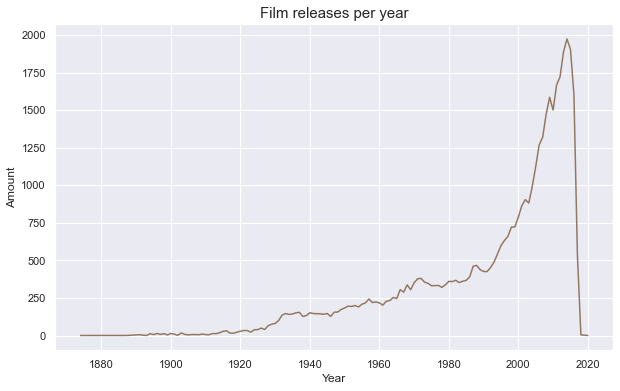

In [90]:
vis.col_time_series(dataset=movies_df, column='release_date', time_period='Y', agg='count', colour=5)
vis.label_fig(title='Film releases per year', xlab='Year', ylab='Amount', tit_size=15)
vis.save_repo(name='film_releases')

El final de la línea sufre un brusco descenso en cantidad de películas. Haciendo una exploración rápida de la tabla vemos como hay películas que han sido añadidas más allá de la fecha en la que se generó este dataset (2017), por lo tanto no estrenadas aun. Por ello, el número de películas recogidos para estos años no es representativo y es mejor no tenerlos en cuenta.

### -original_language

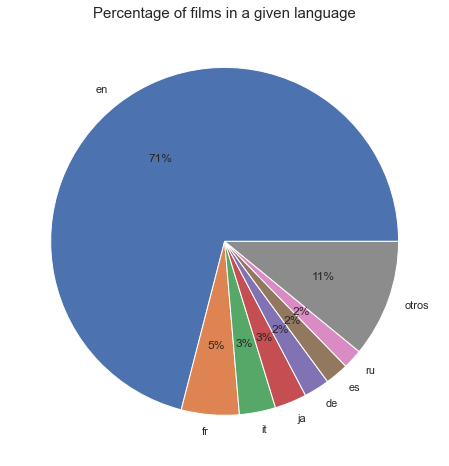

In [91]:
vis.column_pie(dataset=movies_df, column='original_language', n_to_show=7)
vis.label_fig(title='Percentage of films in a given language', tit_size=15)
vis.save_repo(name='lang_percnt')

### -production_countries

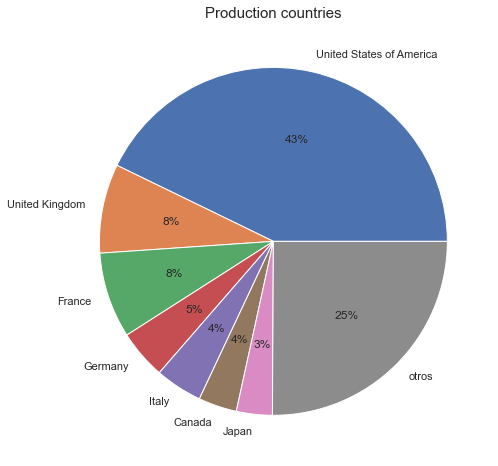

In [92]:
vis.column_pie(dataset=prod_countries_expanded, n_to_show=7)
vis.label_fig(title='Production countries', tit_size=15)
vis.save_repo('prod_countries')

### -genres

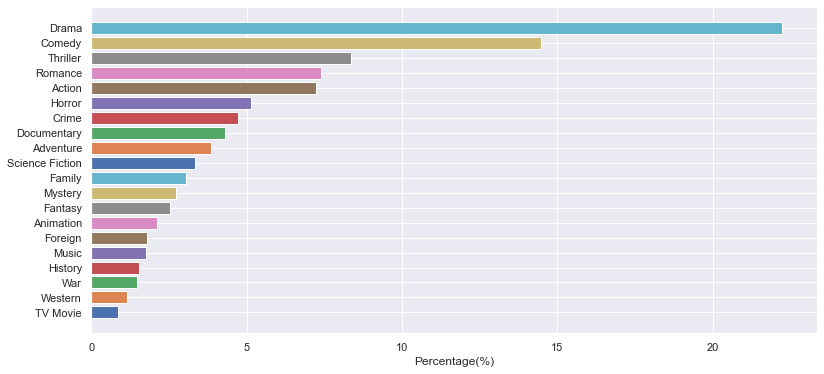

In [72]:
vis.count_bar(dataset=genre_df_expanded)
vis.label_fig(xlab='Percentage(%)')
vis.save_repo(name='genres_percnt')

### -budget

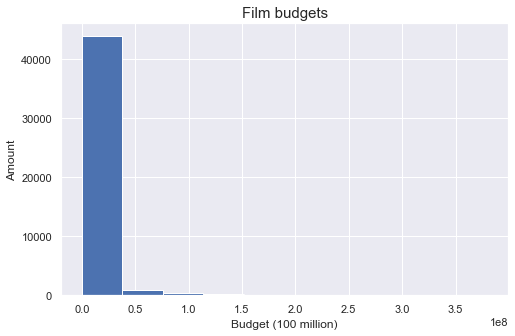

In [82]:
vis.without_0_hist(dataset=movies_df, column='budget', bin=10, without_0s=False)
vis.label_fig(title='Film budgets', xlab='Budget (100 million)', ylab='Amount', tit_size=15)
vis.save_repo(name='budget_0_hist')

La cantidad de elementos 0 hace que el histograma se salga de escala, por eso se opta por remover estos valores para poder entender mejor el resto de la distribución. Además, resulta extraño que una película tenga un presupuesto de 0, por lo que seguramente representen datos faltantes y resulta conveniente dejarlos fuera del estudio

Además, investigando, se ha averiguado que algunos valores con de pocos dígitos se han introducido como si la columna representara millones en vez de unidades. Esto se tomará en cuenta en el resto de las investigaciones. Como no hay presupuestos por encima de 1000 millones, se eliminan aquellos valores con presupuesto menor a 1000

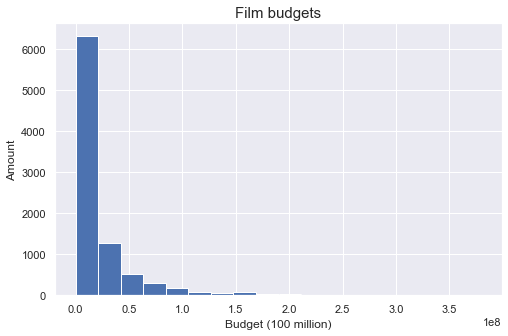

In [83]:
vis.without_0_hist(dataset=movies_df, column='budget', bin=18)
vis.label_fig(title='Film budgets', xlab='Budget (100 million)', ylab='Amount', tit_size=15)
vis.save_repo(name='budget_hist')

Al existir diferencias tan grandes (del orden de potencias de 10) entre los presupuestos de las películas hace que este gráfico no sea una buena representación de la distribución de los datos y sea necesario representar la información bajo una escala logarítmica

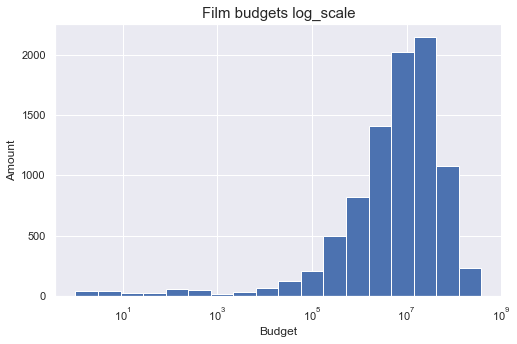

In [114]:
vis.log_hist(dataset=movies_df, column='budget', bin=18, without_0s=True, colour=0)
vis.label_fig(title='Film budgets log_scale', xlab='Budget', ylab='Amount', tit_size=15)
vis.save_repo(name='budget_log_hist')

### -revenue

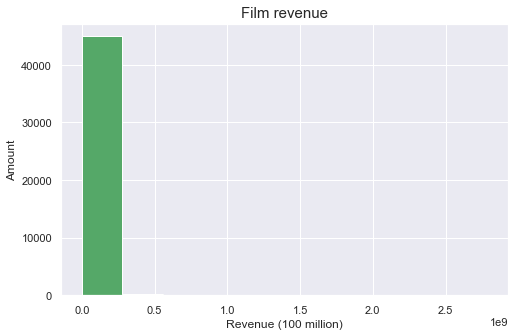

In [85]:
vis.without_0_hist(dataset=movies_df, column='revenue', bin=10, without_0s=False, colour=2)
vis.label_fig(title='Film revenue', xlab='Revenue (100 million)', ylab='Amount', tit_size=15)
vis.save_repo(name='revenue_0_hist')

Para las recaudaciones pasa igual que con los presupuestos, eliminamos los ceros

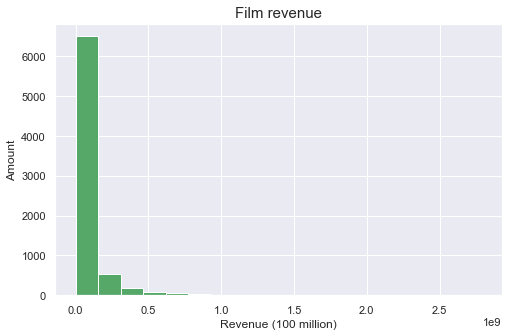

In [86]:
vis.without_0_hist(dataset=movies_df, column='revenue', bin=18, without_0s=True, colour=2)
vis.label_fig(title='Film revenue', xlab='Revenue (100 million)', ylab='Amount', tit_size=15)
vis.save_repo(name='revenue_hist')

Pasamos a escala logarítmica

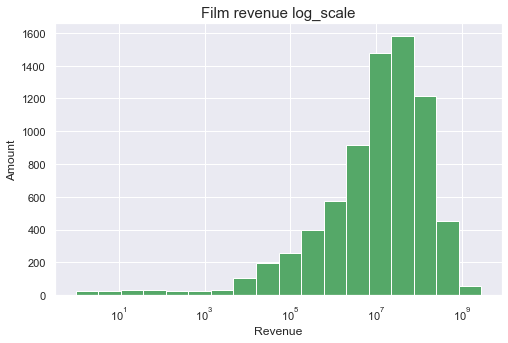

In [87]:
vis.log_hist(dataset=movies_df, column='revenue', bin=18, without_0s=True, colour=2)
vis.label_fig(title='Film revenue log_scale', xlab='Revenue', ylab='Amount', tit_size=15)
vis.save_repo(name='revenue_log_hist')

### -vote_average

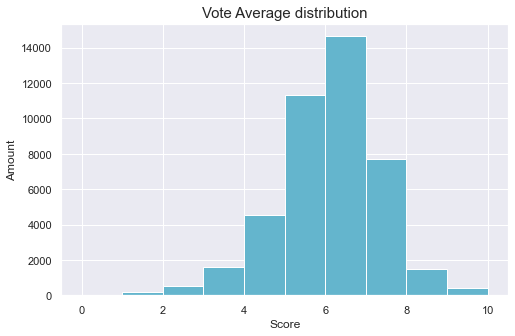

In [110]:
vis.without_0_hist(dataset=movies_df, column='vote_average', bin=list(range(11)), colour=9)
vis.label_fig(title='Vote Average distribution', xlab='Score', ylab='Amount', tit_size=15)
vis.save_repo(name='vote_av_hist')

### -runtime

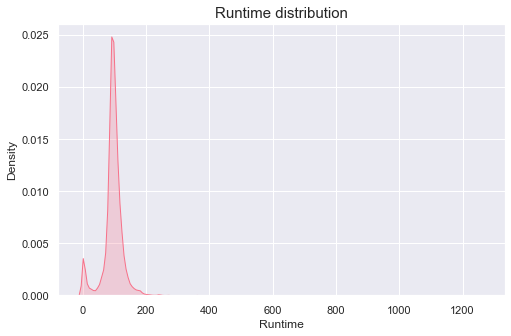

In [103]:
vis.dense_plot(serie=movies_df.runtime)
vis.label_fig(title='Runtime distribution', xlab='Runtime', tit_size=15)
vis.save_repo(name='runtime_dense')

En vista del análisis realizado nos desharemos de las siguientes filas:

        -Eliminar elementos más alla de 2017
        -Deshacernos de valores de budget <1000

*Consideraciones: tendremos en cuenta la gran cantidad de 0 en la columna revenue, además de otros datos extraños antes mencionados, aunque por ahora no se eliminarán

In [120]:
movies_copy = movies_df.copy()
# copia de seguridad

In [123]:
movies_df = movies_df[movies_df.budget > 999]
movies_df = movies_df[movies_df.release_date < '2017-01-01']
len(movies_df)

8516

El número de filas se ha reducido considerablemente, en más de 36.860

## Correlation Matrix

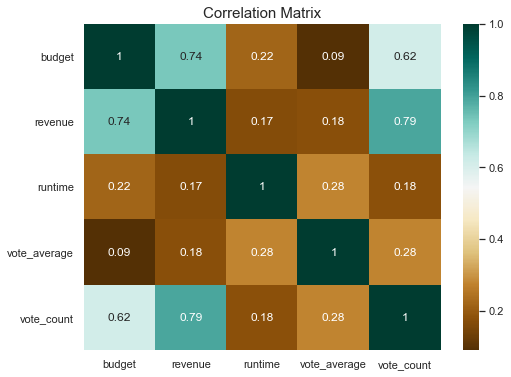

In [126]:
plt.figure(figsize=(8,6))
sns.heatmap(movies_df.corr(), cmap="BrBG",annot=True)
vis.label_fig(title='Correlation Matrix', tit_size=15)
vis.save_repo('corr_matrix')

# Hypothesis evaluation

Se sacarán gráficos que ayudarán a determinar la veracidad de la hipótesis planteada

In [ ]:
vis.two_var_ts(movies_df, 'budget', 'revenue', 'Y', agg='mean', colour=(0,2))
vis.label_fig(title='Busget vs Revenue in time', xlab='Year', ylab='10 million')
vis.save_repo('budgett_vs_revenue')

# Conclusión

En vista de los gráficos obtenidos, se concluye que la hipótesis no era cierta y que de hecho el cine si es, en términos generales una industria rentable

## Distribución del tiempo